In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/raw/kicksharing.csv')

In [3]:
df.head(3)

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

In [5]:
df.describe()

,order_rk,party_rk,age,minute_cost,activation_cost,hold_amount,distance_km,book_time_zone_cd,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
count,3.967490e+05,3.967490e+05,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,366992.000000,21948.000000
mean,2.892236e+08,5.988426e+08,31.544006,7.288688,42.593226,299.983869,3.681031,3.536155,127.647694,37.516121,127.789319
std,3.813458e+07,3.311675e+08,9.434545,1.289492,11.989974,1.939153,141.862349,1.209075,100.122365,75.208560,496.812143
min,2.526112e+08,1.471700e+04,12.000000,1.500000,0.000000,80.000000,0.000000,0.000000,0.000000,-161.940000,1.000000
25%,2.618150e+08,2.962323e+08,24.000000,6.490000,30.000000,300.000000,0.941054,3.000000,80.840000,11.240000,43.000000
50%,2.704367e+08,6.110092e+08,31.000000,7.490000,50.000000,300.000000,1.729883,3.000000,103.940000,18.730000,62.000000
75%,3.432678e+08,8.646921e+08,37.000000,8.220000,50.000000,300.000000,3.063694,3.000000,142.100000,35.060000,81.000000
max,3.562528e+08,1.301075e+09,94.000000,19.990000,50.000000,500.000000,56012.640308,12.000000,5627.640000,3185.000000,55429.360970


In [6]:
df.isnull().sum()

order_rk                        0
party_rk                        0
gender_cd                    2921
age                             0
education_level_cd         206690
marital_status_cd          179020
lvn_state_nm                34177
minute_cost                     0
activation_cost                 0
hold_amount                     0
transport_model                 0
distance_km                     0
created_dttm                    0
book_start_dttm                 0
book_end_dttm                   0
book_time_zone_cd               0
local_book_start_dttm           0
nominal_price_rub_amt           0
loyalty_accrual_rub_amt     29757
loyalty_accrual_bns_amt    374801
dtype: int64

In [7]:
df['created_dttm'] = pd.to_datetime(df['created_dttm'])
df['book_start_dttm'] = pd.to_datetime(df['book_start_dttm'])
df['book_end_dttm'] = pd.to_datetime(df['book_end_dttm'])
df['local_book_start_dttm'] = pd.to_datetime(df['local_book_start_dttm'])


In [8]:
df['mounth'] = df['created_dttm'].dt.month
df['day'] = df['created_dttm'].dt.day
df['is_weekend'] = (df['created_dttm'].dt.dayofweek >= 5).astype(int)

In [9]:
df.head(8)

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,mounth,day,is_weekend
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,...,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN,8,7,0
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,...,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN,10,17,0
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,...,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN,9,19,0
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,...,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN,10,4,0
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,...,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN,7,10,0
5,277397094,5247768,M,42,NaN,NaN,МОСКВА,7.49,50.0,300.0,...,2024-09-10 09:40:24.036000,2024-09-10 09:41:03.644495,3,2024-09-10 09:40:24.036000,0.00,NaN,NaN,9,10,0
6,273528957,801272780,F,19,NaN,NaN,РЕСП ТАТАРСТАН,7.49,30.0,300.0,...,2024-09-03 14:10:34.524349,2024-09-03 14:21:25.119585,3,2024-09-03 14:10:34.524349,112.39,28.00,NaN,9,3,0
7,265062394,866880584,M,38,NaN,NaN,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,...,2024-08-03 03:09:38.493851,2024-08-03 03:18:47.841493,5,2024-08-03 05:09:38.493851,89.90,12.99,NaN,8,3,1


In [10]:
df['hour'] = df['created_dttm'].dt.hour
df['part_of_day'] = df['hour'].apply(lambda x: 'night' if x < 6 else 'morning' if x < 12  else 'afternoon' if x < 18 else 'evening')
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,mounth,day,is_weekend,hour,part_of_day
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,...,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN,8,7,0,9,morning
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,...,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN,10,17,0,14,afternoon
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,...,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN,9,19,0,5,night
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,...,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN,10,4,0,16,afternoon
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,...,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN,7,10,0,6,morning


{'whiskers': [<matplotlib.lines.Line2D at 0x1d8b35969f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8b3596f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8bc692b70>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8b35975c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d8b35978f0>],
 'means': []}

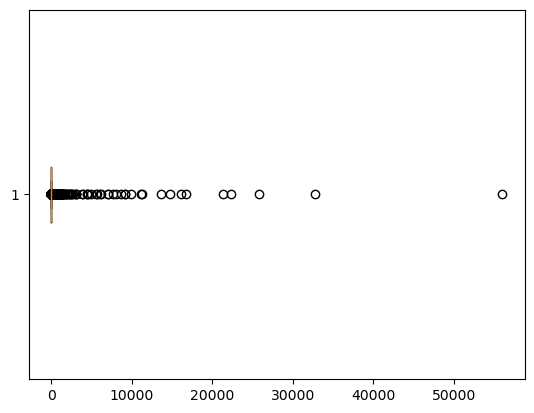

In [11]:
plt.boxplot(df['distance_km'], vert=False)

Нужно удалить выбросы

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8b363fb90>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8b363ffb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8b363f920>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8b3668620>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d8b36688c0>],
 'means': []}

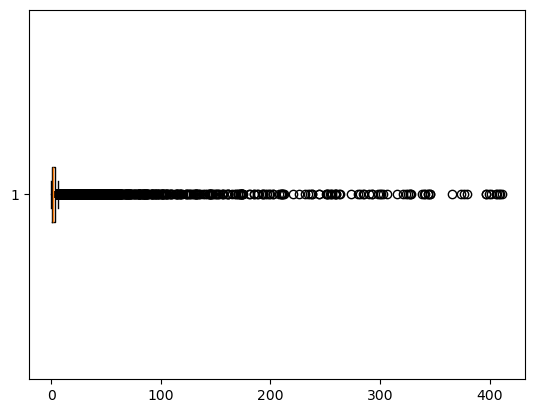

In [12]:

def remove_outliers_3sigma(df, column_name): # Удаляет выбросы за пределами 3 стандартных отклонений
    mean = df[column_name].mean()
    std = df[column_name].std()
    lowerr = mean - 3 * std
    upperr = mean + 3 * std
    if (lowerr > 0):
        lowerr = 0
    return df[(df[column_name] >= lowerr) & (df[column_name] <= upperr)]

df_clean = remove_outliers_3sigma(df, 'distance_km')
plt.boxplot(df_clean['distance_km'], vert=False)


In [13]:
df_clean.describe()

,order_rk,party_rk,age,minute_cost,activation_cost,hold_amount,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,mounth,day,is_weekend,hour
count,3.966590e+05,3.966590e+05,396659.000000,396659.000000,396659.000000,396659.000000,396659.000000,396659,396659,396659,396659.000000,396659,396659.000000,366905.000000,21948.000000,396659.000000,396659.000000,396659.000000,396659.000000
mean,2.892256e+08,5.988340e+08,31.543227,7.288568,42.591874,299.983865,2.587401,2024-08-18 20:00:16.294189568,2024-08-18 20:00:22.407341568,2024-08-18 20:11:48.765596928,3.536272,2024-08-18 20:32:32.985495296,127.631444,37.508193,127.789319,8.081231,15.791549,0.259220,12.121533
min,2.526112e+08,1.471700e+04,12.000000,1.500000,0.000000,80.000000,0.000000,2024-04-07 14:56:47,2024-04-07 14:57:01.030814,2024-04-07 15:00:26.432310,0.000000,2024-04-07 14:57:01.030814,0.000000,-161.940000,1.000000,4.000000,1.000000,0.000000,0.000000
25%,2.618150e+08,2.962323e+08,24.000000,6.490000,30.000000,300.000000,0.940880,2024-07-22 05:10:00.500000,2024-07-22 05:10:04.421905152,2024-07-22 05:19:08.408855552,3.000000,2024-07-22 05:36:14.958041088,80.800000,11.240000,43.000000,7.000000,8.000000,0.000000,8.000000
50%,2.704367e+08,6.110079e+08,31.000000,7.490000,50.000000,300.000000,1.729489,2024-08-23 10:43:51,2024-08-23 10:43:57.083792896,2024-08-23 10:54:08.383456,3.000000,2024-08-23 11:25:46.439595008,103.940000,18.730000,62.000000,8.000000,16.000000,0.000000,13.000000
75%,3.432678e+08,8.646921e+08,37.000000,8.220000,50.000000,300.000000,3.062256,2024-09-16 14:01:26,2024-09-16 14:01:30.582000128,2024-09-16 14:14:27.579638016,3.000000,2024-09-16 14:35:06.626499840,142.070000,35.060000,81.000000,9.000000,23.000000,1.000000,16.000000
max,3.562528e+08,1.301075e+09,94.000000,19.990000,50.000000,500.000000,411.232861,2024-10-21 17:18:04,2024-10-21 17:18:07.715000,2024-10-21 17:23:06.640943,12.000000,2024-10-21 21:13:43.199000,5627.640000,3185.000000,55429.360970,10.000000,31.000000,1.000000,23.000000
std,3.813554e+07,3.311613e+08,9.434496,1.289518,11.990754,1.939373,5.603198,NaN,NaN,NaN,1.209181,NaN,100.074203,75.150634,496.812143,1.211845,8.762905,0.438207,5.360571


In [14]:
df_clean.loc[19]

order_rk                                    254950728
party_rk                                    600634823
gender_cd                                           M
age                                                31
education_level_cd                                NaN
marital_status_cd                                 NaN
lvn_state_nm                        НИЖЕГОРОДСКАЯ ОБЛ
minute_cost                                      4.99
activation_cost                                  40.0
hold_amount                                     300.0
transport_model                                     E
distance_km                                  3.931971
created_dttm                      2024-06-26 04:15:06
book_start_dttm            2024-06-26 04:15:08.953368
book_end_dttm              2024-06-26 04:27:46.509259
book_time_zone_cd                                   3
local_book_start_dttm      2024-06-26 04:15:08.953368
nominal_price_rub_amt                          104.87
loyalty_accrual_rub_amt     

In [16]:
mask = (df_clean['loyalty_accrual_bns_amt'] > 10 * df_clean['nominal_price_rub_amt'])
print(mask.value_counts())


False    396311
True        348
Name: count, dtype: int64


In [ ]:
df_clean = df_clean[~mask]


In [20]:
df_clean.describe()

,order_rk,party_rk,age,minute_cost,activation_cost,hold_amount,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,mounth,day,is_weekend,hour
count,3.963110e+05,3.963110e+05,396311.000000,396311.000000,396311.000000,396311.000000,396311.000000,396311,396311,396311,396311.000000,396311,396311.000000,366905.000000,21600.000000,396311.000000,396311.000000,396311.000000,396311.000000
mean,2.892385e+08,5.988006e+08,31.542291,7.288755,42.589810,299.983851,2.588401,2024-08-18 20:13:53.781366016,2024-08-18 20:13:59.895975424,2024-08-18 20:25:26.407969792,3.536157,2024-08-18 20:46:10.061931008,127.648532,37.508193,105.658752,8.081537,15.791669,0.259200,12.120852
min,2.526112e+08,1.471700e+04,12.000000,1.500000,0.000000,80.000000,0.000000,2024-04-07 14:56:47,2024-04-07 14:57:01.030814,2024-04-07 15:00:26.432310,0.000000,2024-04-07 14:57:01.030814,0.000000,-161.940000,1.000000,4.000000,1.000000,0.000000,0.000000
25%,2.618150e+08,2.962323e+08,24.000000,6.490000,30.000000,300.000000,0.941522,2024-07-22 05:19:22.500000,2024-07-22 05:19:26.228542464,2024-07-22 05:25:04.266694656,3.000000,2024-07-22 05:41:05.398661120,80.880000,11.240000,43.000000,7.000000,8.000000,0.000000,8.000000
50%,2.704367e+08,6.110109e+08,31.000000,7.490000,50.000000,300.000000,1.730252,2024-08-23 11:01:14,2024-08-23 11:01:30.535968,2024-08-23 11:12:09.692288,3.000000,2024-08-23 11:43:52.528473088,103.940000,18.730000,62.000000,8.000000,16.000000,0.000000,13.000000
75%,3.432679e+08,8.646921e+08,37.000000,8.220000,50.000000,300.000000,3.063198,2024-09-16 14:14:26.500000,2024-09-16 14:14:31.355500032,2024-09-16 14:26:17.929961984,3.000000,2024-09-16 14:45:49.920999936,142.200000,35.060000,79.000000,9.000000,23.000000,1.000000,16.000000
max,3.562528e+08,1.301075e+09,94.000000,19.990000,50.000000,500.000000,411.232861,2024-10-21 17:18:04,2024-10-21 17:18:07.715000,2024-10-21 17:23:06.640943,12.000000,2024-10-21 21:13:43.199000,5627.640000,3185.000000,5190.476220,10.000000,31.000000,1.000000,23.000000
std,3.814157e+07,3.311870e+08,9.434941,1.289376,11.992918,1.940224,5.605251,NaN,NaN,NaN,1.208980,NaN,99.967283,75.150634,194.229190,1.211969,8.762917,0.438196,5.360364


In [21]:
df_clean.to_csv('../data/processed/kicksharing_cleaned.csv', index=False)